In [1]:
from lib.VisualizationProvider import (plot_2d_distributions, 
                                       plot_scatter, 
                                       plot_gaussian_distributions
                                      )

from lib.FeatureProvider import (load_all_grids, 
                                 reduce_dimensionality_umap, 
                                 reduce_dimensionality_kpca, 
                                 reduce_dimensionality_tsne
                                )

from lib.StaticMetricProvider import (test_all_introspection_technique_combinations, 
                                      calc_distributions, 
                                      get_values_from_distance_matrix, 
                                      difference_distances, 
                                      apply_log_to_distances
                                     )

2023-10-27 22:08:02.929758: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 22:08:10.725378: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /scratch/ponel/python/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/cuda-12.0/lib64
2023-10-27 22:08:10.725665: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /scratch/ponel/python/lib/pyt

In [2]:
MODEL_TYPE = "cnn"
DATASET = "cifar10"
ATTACK1 = "correct"
ATTACK2 = "RandLabels"
MAX_IMAGES = 100

In [3]:
all_grids_1 = load_all_grids(model_type=MODEL_TYPE, dataset=DATASET, attack=ATTACK1, max_images=MAX_IMAGES)
all_grids_2 = load_all_grids(model_type=MODEL_TYPE, dataset=DATASET, attack=ATTACK2, max_images=MAX_IMAGES)

Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading i

In [5]:
all_grids_1_kpca = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='linear')

Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique g_t_i...


In [4]:
distances1, techniques, distance_functions = test_all_introspection_technique_combinations(all_grids_1, print_results=False, average_results=False)
distances2, techniques, distance_functions = test_all_introspection_technique_combinations(all_grids_2, print_results=False, average_results=False)

In [5]:
difference = difference_distances(reference=distances1, delta=distances2, fold_change_and_log_scale=True)

In [6]:
mw_test(distances1, distances2)

/scratch/ponel/python/lib/python3.8/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

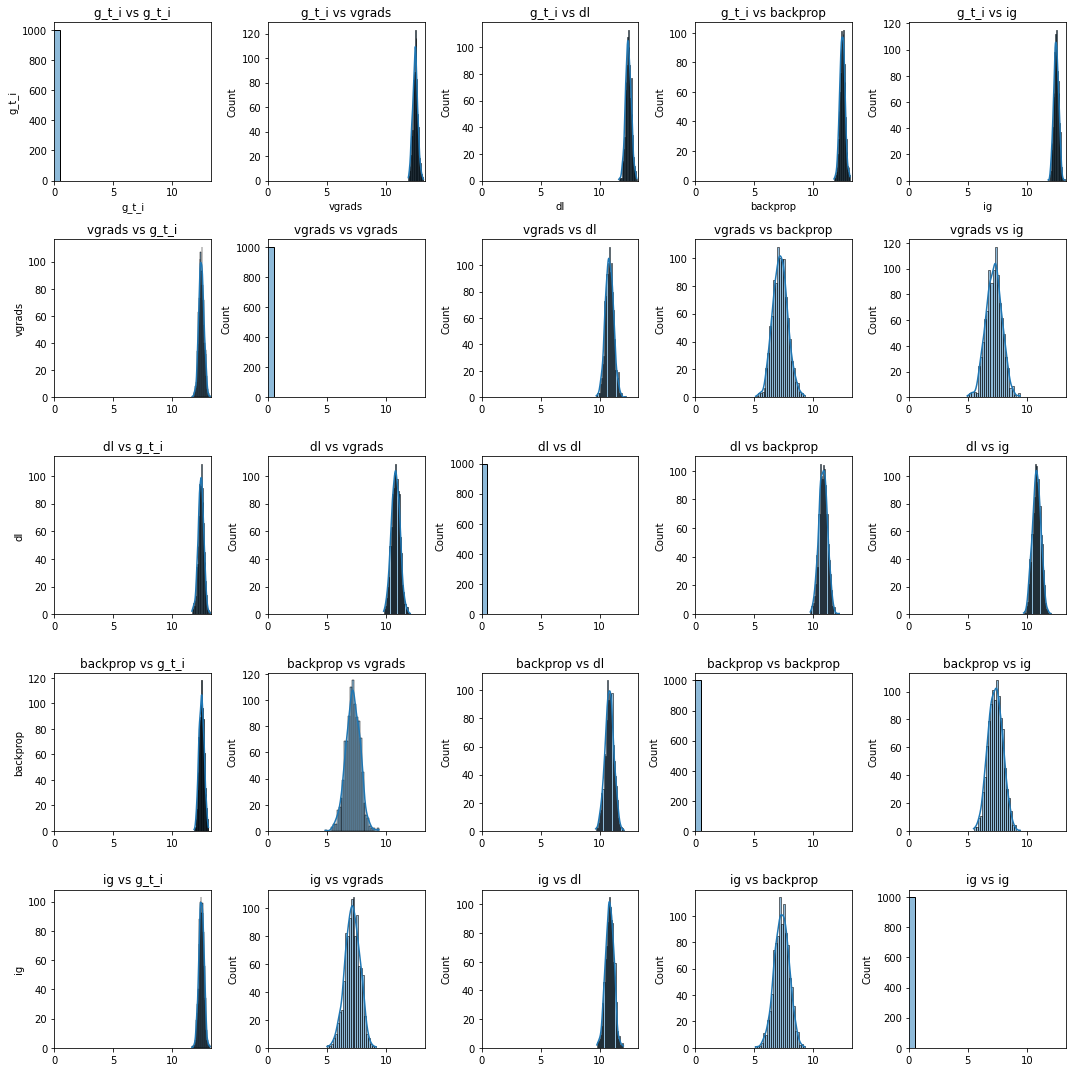

In [6]:
# Plot the Non-Attacked Version (log Scale)
plot_gaussian_distributions(apply_log_to_distances(distances1), list(techniques), 'euclidean')

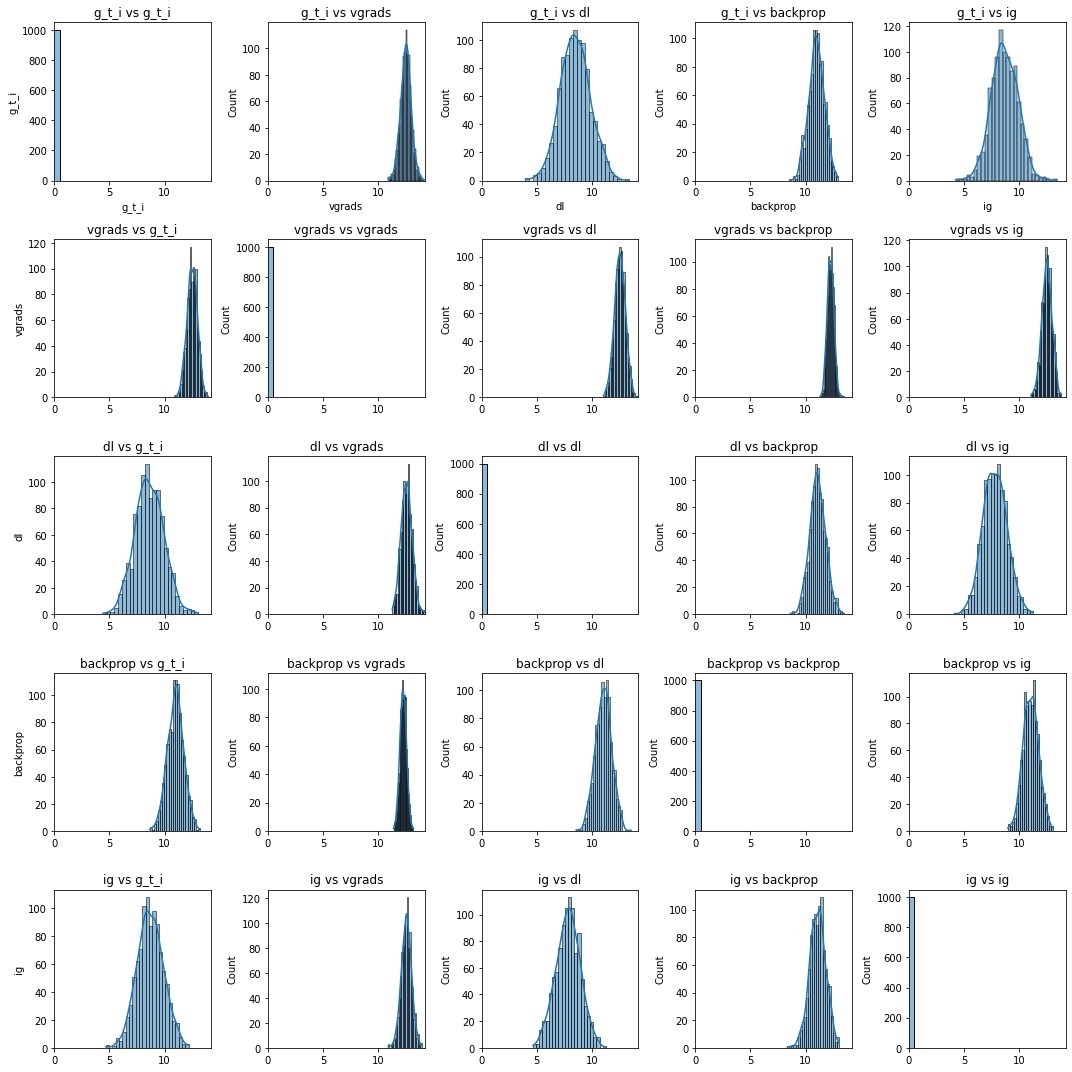

In [7]:
# Plot the Attacked Version (log Scale)
plot_gaussian_distributions(apply_log_to_distances(distances2), list(techniques), 'euclidean')

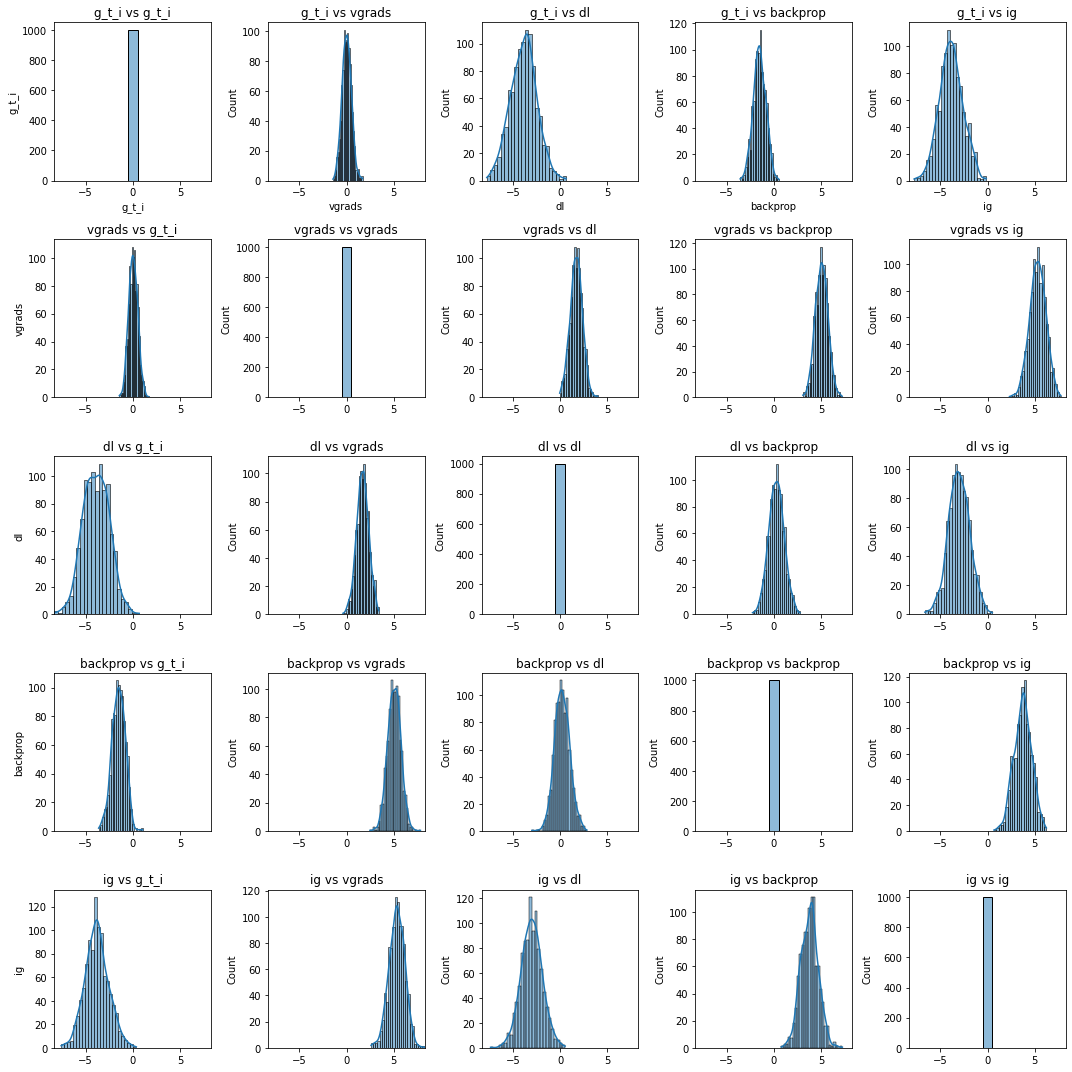

In [8]:
plot_gaussian_distributions(difference, list(techniques), 'euclidean')